# House Price Prediction

In [ ]:
# Recessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing dataset
df = pd.read_csv('datasets\housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Basic Exploration
df.info() # Basic info
df.describe()# statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Data Preprocessing

In [18]:
df.isnull().sum()
df = df.dropna() # Dropping rows with missing values

# Convert categorical column 'ocean_proximity' using one-hot encoding
# df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


### Train-Test-Split + Feature Scaling

In [19]:
# seperation of features and targets
X=df.drop('median_house_value', axis=1)
y=df['median_house_value']

# trans-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Regression Model using TensorFlow (build)

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compilign the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

e:\COLLEGE\Semester-5\AML\Labs\House Price Prediction\.env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# training the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55678939136.0000 - mae: 206162.1562 - val_loss: 55768731648.0000 - val_mae: 206029.0000
Epoch 2/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 53433802752.0000 - mae: 201477.2812 - val_loss: 51432013824.0000 - val_mae: 196948.6406
Epoch 3/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 46518063104.0000 - mae: 186284.9062 - val_loss: 42187268096.0000 - val_mae: 175902.1875
Epoch 4/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 35463778304.0000 - mae: 158997.3438 - val_loss: 30270863360.0000 - val_mae: 144349.5469
Epoch 5/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 23949824000.0000 - mae: 125128.8516 - val_loss: 20092946432.0000 - val_mae: 112536.8594
Epoch 6/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 15783185408.0000 - mae: 97801.5234 - val_loss: 14186770432.0000 - val_mae: 91640.2031
Epoch 7/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 11844912128.0000 - mae: 83514.6562 - val_l

### Visualization of the training

Plotting loss curve

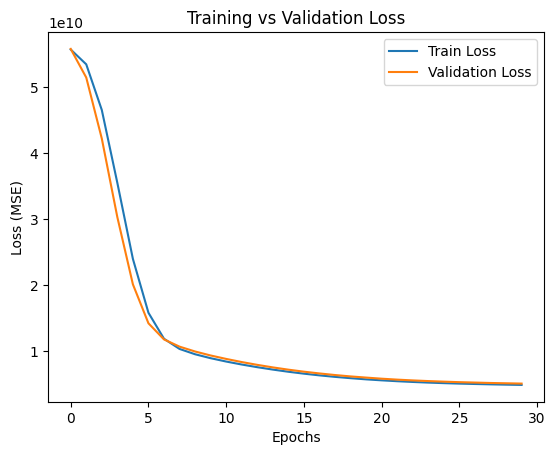

In [23]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [24]:
# Evaluating the performance
model.evaluate(X_test,y_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 4962848256.0000 - mae: 50558.1953


[4962848256.0, 50558.1953125]

### Predictions! (PREDICTIONS OF JUST THE FIRST 10 HOUSES ARE DISPLAYED TO KEEP THE NOTEBOOK CLEAN AND AVOID OVERFLOODING)

To view predicitons of all the houses remove the slicing ([:10])

Raw Prediction

In [28]:
y_pred = model.predict(X_test)
y_pred[:10]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


array([[197278.75 ],
       [143989.4  ],
       [198133.28 ],
       [186848.11 ],
       [159065.47 ],
       [ 82666.945],
       [286119.8  ],
       [262471.75 ],
       [350717.62 ],
       [109145.   ]], dtype=float32)

Simple and readable prediciton

In [ ]:
preds = y_pred.flatten()

for i, price in enumerate(preds[:10]):
    print(f"Predicted Price of House {i+1}: ${price:,.2f}")

Predicted Price of House 1: $197,278.75
Predicted Price of House 2: $143,989.41
Predicted Price of House 3: $198,133.28
Predicted Price of House 4: $186,848.11
Predicted Price of House 5: $159,065.47
Predicted Price of House 6: $82,666.95
Predicted Price of House 7: $286,119.81
Predicted Price of House 8: $262,471.75
Predicted Price of House 9: $350,717.62
Predicted Price of House 10: $109,145.00
Predicted Price of House 11: $67,659.77
Predicted Price of House 12: $99,642.95
Predicted Price of House 13: $258,148.27
Predicted Price of House 14: $200,569.88
Predicted Price of House 15: $86,073.27
Predicted Price of House 16: $183,242.50
Predicted Price of House 17: $209,688.69
Predicted Price of House 18: $292,192.31
Predicted Price of House 19: $173,929.73
Predicted Price of House 20: $277,939.19
Predicted Price of House 21: $239,852.78
Predicted Price of House 22: $158,756.03
Predicted Price of House 23: $226,208.00
Predicted Price of House 24: $75,779.44
Predicted Price of House 25: $

Actual VS Prediction price

In [ ]:
preds = y_pred.flatten()

comparison_df = pd.DataFrame({
    "Actual Price (USD)": y_test[:10].values,
    "Predicted Price (USD)": preds[:10]
})

# Format numbers for readability
comparison_df["Actual Price (USD)"] = comparison_df["Actual Price (USD)"].apply(lambda x: f"${x:,.2f}")
comparison_df["Predicted Price (USD)"] = comparison_df["Predicted Price (USD)"].apply(lambda x: f"${x:,.2f}")
comparison_df


,Actual Price (USD),Predicted Price (USD)
0,"$245,800.00","$197,278.75"
1,"$137,900.00","$143,989.41"
2,"$218,200.00","$198,133.28"
3,"$220,800.00","$186,848.11"
4,"$170,500.00","$159,065.47"
5,"$75,000.00","$82,666.95"
6,"$269,400.00","$286,119.81"
7,"$228,900.00","$262,471.75"
8,"$500,001.00","$350,717.62"
9,"$80,800.00","$109,145.00"


Predicitons of all the houses:

In [ ]:
preds = y_pred.flatten()

comparison_df = pd.DataFrame({
    "Actual Price (USD)": y_test.values,
    "Predicted Price (USD)": preds
})

# Format values for readability
comparison_df["Actual Price (USD)"] = comparison_df["Actual Price (USD)"].apply(lambda x: f"${x:,.2f}")
comparison_df["Predicted Price (USD)"] = comparison_df["Predicted Price (USD)"].apply(lambda x: f"${x:,.2f}")
comparison_df


,Actual Price (USD),Predicted Price (USD)
0,"$245,800.00","$197,278.75"
1,"$137,900.00","$143,989.41"
2,"$218,200.00","$198,133.28"
3,"$220,800.00","$186,848.11"
4,"$170,500.00","$159,065.47"
...,...,...
4082,"$500,001.00","$263,805.84"
4083,"$157,900.00","$179,072.94"
4084,"$100,200.00","$96,259.07"
4085,"$127,700.00","$125,379.45"
